In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import scipy
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

In [2]:
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip=True, preprocessing_function=preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [3]:
train = train_datagen.flow_from_directory(directory="./data/Health Detector/train", target_size=(256,256), batch_size=32)

val = val_datagen.flow_from_directory(directory="./data/Health Detector/valid", target_size=(256,256), batch_size=32)

Found 70295 images belonging to 2 classes.
Found 17572 images belonging to 2 classes.


In [4]:
t_img, label = train.next()

In [5]:
t_img.shape

(32, 256, 256, 3)

In [6]:
def plotImage(img_arr, label):
    for img, l in zip(img_arr, label):
        plt.figure(figsize=(5,5))
        plt.imshow(img)
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


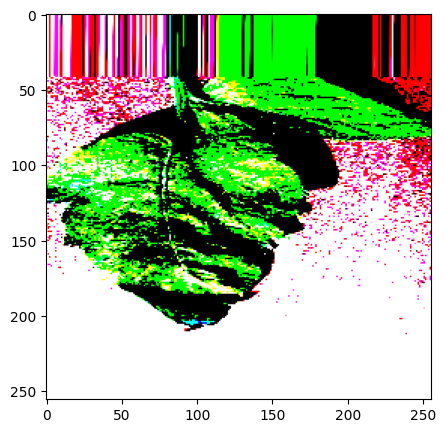

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


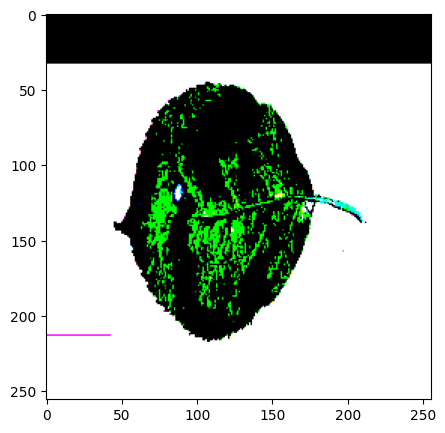

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


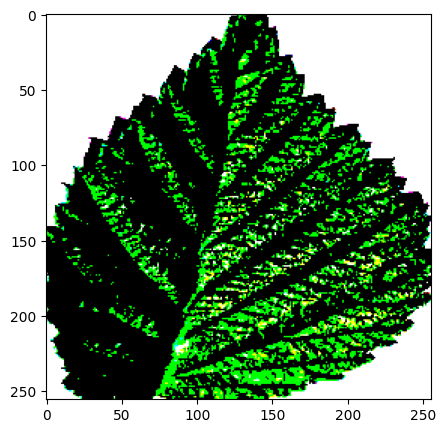

In [7]:
plotImage(t_img[:3], label[:3])

In [55]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16

In [9]:
base_model = VGG16(input_shape=(256,256,3), include_top=False)

2023-09-24 09:06:56.172403: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-24 09:06:56.305358: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-24 09:06:56.305411: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-24 09:06:56.309227: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-24 09:06:56.309286: I tensorflow/compile

In [10]:
for layer in base_model.layers:
    layer.trainable = False

In [11]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [12]:
X = Flatten()(base_model.output)

X = Dense(units=2, activation='softmax')(X)

model = Model(base_model.input, X)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [14]:
# from tensorflow.keras.optimizers.legacy import Adam

model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [15]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=15, verbose=1)

mc = ModelCheckpoint(filepath='health_detector_more_steps_best.h5', monitor='val_accuracy', min_delta=0.01, patience=15, verbose=1, save_best_only=True)

cb = [es, mc]

In [16]:
# his = model.fit(train, epochs=50, steps_per_epoch=16, validation_data=val, validation_steps=16, callbacks=cb, verbose=1)
his = model.fit(train, epochs=50, steps_per_epoch=32, validation_data=val, validation_steps=32, callbacks=cb, verbose=1)

Epoch 1/50


2023-09-24 09:07:29.839543: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-24 09:07:31.944746: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-24 09:07:31.962259: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-24 09:07:31.962352: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if m

 2/32 [>.............................] - ETA: 3s - loss: 6.0098 - accuracy: 0.5312  

2023-09-24 09:07:33.171520: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 [==============================] - ETA: 0s - loss: 2.7033 - accuracy: 0.8271
Epoch 1: val_accuracy improved from -inf to 0.88672, saving model to health_detector_more_steps_best.h5
32/32 [==============================] - 17s 348ms/step - loss: 2.7033 - accuracy: 0.8271 - val_loss: 2.0231 - val_accuracy: 0.8867
Epoch 2/50


/root/miniconda3/envs/sih/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - ETA: 0s - loss: 2.4075 - accuracy: 0.8662
Epoch 2: val_accuracy improved from 0.88672 to 0.91699, saving model to health_detector_more_steps_best.h5
32/32 [==============================] - 12s 374ms/step - loss: 2.4075 - accuracy: 0.8662 - val_loss: 1.3212 - val_accuracy: 0.9170
Epoch 3/50
32/32 [==============================] - ETA: 0s - loss: 1.8520 - accuracy: 0.8955
Epoch 3: val_accuracy did not improve from 0.91699
32/32 [==============================] - 13s 410ms/step - loss: 1.8520 - accuracy: 0.8955 - val_loss: 2.4123 - val_accuracy: 0.8838
Epoch 4/50
32/32 [==============================] - ETA: 0s - loss: 2.7865 - accuracy: 0.8887
Epoch 4: val_accuracy did not improve from 0.91699
32/32 [==============================] - 12s 363ms/step - loss: 2.7865 - accuracy: 0.8887 - val_loss: 2.5770 - val_accuracy: 0.8916
Epoch 5/50
32/32 [==============================] - ETA: 0s - loss: 2.1433 - accuracy: 0.9102
Epoch 5: val_accuracy improved

In [17]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

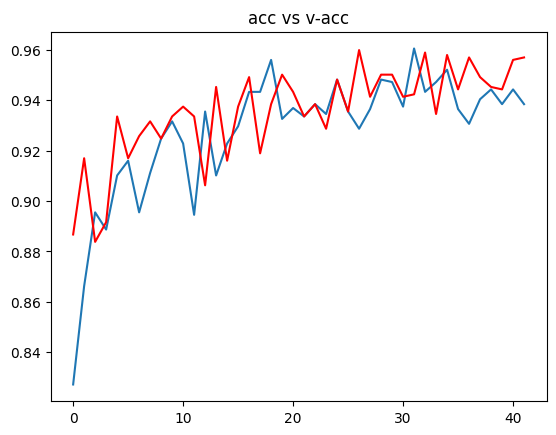

In [18]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")
plt.title("acc vs v-acc")
plt.show()

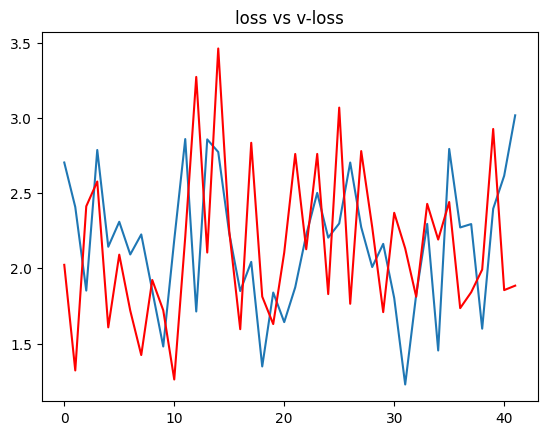

In [19]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c="red")
plt.title("loss vs v-loss")
plt.show()

In [65]:
from keras.models import load_model

model = load_model("./health_detector_more_steps_best.h5")

In [49]:
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))
train.class_indices.keys()

dict_keys(['Healthy', 'Unhealthy'])

In [ ]:
acc = model.evaluate(val)[1]

print(f"The accuracy is {acc*100}%")

In [51]:
ref

{0: 'Healthy', 1: 'Unhealthy'}

In [56]:
def prediction(path, model):
    img = load_img(path, target_size=(256, 256))
    i = img_to_array(img)
    
    im = preprocess_input(i)
    
    img = np.expand_dims(im, axis=0)
    
    pred = np.argmax(model.predict(img))
    
    print(f"The prediction is {ref[pred]}")
    # if "healthy" in ref[pred].lower():
    #     print("The plant is healthy")
    # else:
    #     print("The plant is unhealthy")

In [66]:
path = "./data/test/h1.jpg"
prediction(path, model)

1/1 [==============================] - 0s 92ms/step
The prediction is Healthy


In [59]:
path = "./data/test/uh1.jpg"
prediction(path, model)

1/1 [==============================] - 0s 22ms/step
The prediction is Unhealthy


In [40]:
path = "./data/test/uh2.jpg"
prediction(path, model)

1/1 [==============================] - 0s 18ms/step


The prediction is Unhealthy


In [41]:
path = "./data/test/uh3.jpg"
prediction(path, model)

1/1 [==============================] - 0s 19ms/step
The prediction is Unhealthy


In [62]:
path = "./data/test/uh-r.jpg"
prediction(path, model)

1/1 [==============================] - 0s 22ms/step
The prediction is Unhealthy


In [71]:
path = "./data/test/images/uht1.jpg"
prediction(path, model)
path = "./data/test/images/uht4.jpg"
prediction(path, model)
path = "./data/test/images/uht5.jpg"
prediction(path, model)
path = "./data/test/images/ht1.jpg"
prediction(path, model)
path = "./data/test/images/ht2.jpg"
prediction(path, model)
path = "./data/test/images/ht3.jpg"
prediction(path, model)
path = "./data/test/images/ht4.jpg"
prediction(path, model)

1/1 [==============================] - 0s 18ms/step
The prediction is Unhealthy
1/1 [==============================] - 0s 17ms/step
The prediction is Unhealthy
1/1 [==============================] - 0s 23ms/step
The prediction is Unhealthy
1/1 [==============================] - 0s 15ms/step
The prediction is Healthy
1/1 [==============================] - 0s 16ms/step
The prediction is Healthy
1/1 [==============================] - 0s 16ms/step
The prediction is Healthy
1/1 [==============================] - 0s 17ms/step
The prediction is Healthy


In [67]:
path = "./data/test/test.jpg"
prediction(path, model)

1/1 [==============================] - 0s 18ms/step
The prediction is Healthy
